## Period vs. Angle Plot of a Simple Pendulum

Pendulum: a 6cm-lock hanging on a 30cm-string. The lock is heavier at the bottom.

Measure the time the lock takes to swing 20 periods. Rounded the time to the nearest integer.

Let the uncertainty of the start angle in the experiment be $\pm3$ degrees and the uncertainty of time to be $\pm0.3$ seconds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
theta_initial = np.array([
    -90, -70, -50, -30, -10, 10, 30, 50, 70, 90
], dtype=np.float64) * np.pi / 180  # in radians
period_measured_raw = np.array([
    [25.4, 24.8, 24.1, 24.0, 23.7, 23.8, 24.1, 24.8, 25.0, 25.7],
    [25.6, 24.9, 24.7, 24.3, 24.0, 24.0, 24.0, 24.6, 25.2, 25.8],
    [25.7, 25.2, 24.7, 24.6, 24.1, 23.9, 24.4, 24.7, 25.0, 26.0]
]) / 20.0  # in seconds
# theta_uncertainty = np.pi / 60
theta_uncertainty = None
period_measured = period_measured_raw.mean(axis=0)
period_uncertainty = np.max(abs(period_measured_raw-period_measured), axis=0)
period_uncertainty += 0.1 / 20.0


Theoretical period (with small angle approximation): $T=2\pi\sqrt{\frac{L}{g}}$

In [3]:
g = 9.80665
l0 = 0.34  # length of the pendulum, accounted for the size of the lock
period_theo = 2.0 * np.pi * (l0 / g)**0.5
print("The theoretical period is", period_theo, "seconds.")


The theoretical period is 1.1699276066457285 seconds.


Period based on the work in `period-angle-theoretical.ipynb`

In [4]:
period_theo_2 = 0.0836356038136672 * theta_initial**2 + 1.1671467807992033

Linear regression

In [5]:
a, b, c = np.polyfit(theta_initial, period_measured, 2)
print(a, b, c)

predicted = (a * theta_initial + b) * theta_initial + c
residual = period_measured - predicted


0.03502489098181729 0.0031830988618380433 1.1994583333333333


Plot the graph

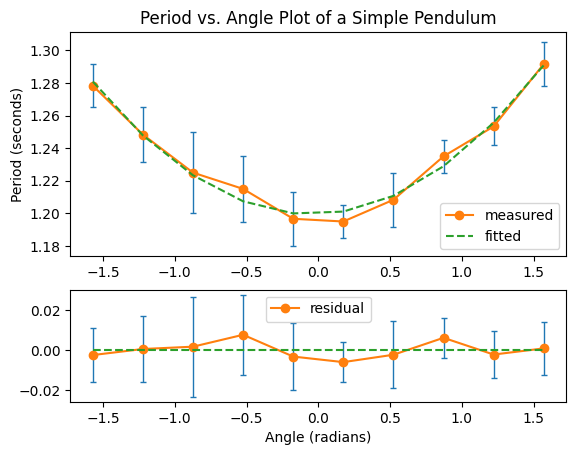

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
ax1.set_title("Period vs. Angle Plot of a Simple Pendulum")
ax2.set_xlabel("Angle (radians)")
ax1.set_ylabel("Period (seconds)")

ax1.errorbar(theta_initial, period_measured,
             xerr=theta_uncertainty, yerr=period_uncertainty,
             fmt=' ', linewidth=1, capsize=2)
ax1.plot(theta_initial, period_measured, 'o-')
ax1.plot(theta_initial, predicted, '--')
# ax1.plot(theta_initial, period_theo_2, '-')
# ax1.legend(["measured", "fitted", "theoretical"])
ax1.legend(["measured", "fitted"])

ax2.errorbar(theta_initial, residual,
             xerr=theta_uncertainty, yerr=period_uncertainty,
             fmt=' ', linewidth=1, capsize=2)
ax2.plot(theta_initial, residual, 'o-')
ax2.legend(["residual"])
ax2.plot(theta_initial, np.zeros(len(theta_initial)), '--')

plt.show()
